<a href="https://colab.research.google.com/github/Parkshinhyang/Programmers/blob/main/%EB%8B%AC%EB%A6%AC%EA%B8%B0_%EA%B2%BD%EC%A3%BC(Lv_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 - 달리기 경주
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/178871)

## 문제 설명

얀에서는 매년 달리기 경주가 열립니다. 해설진들은 선수들이 자기 바로 앞의 선수를 추월할 때 추월한 선수의 이름을 부릅니다. 예를 들어 1등부터 3등까지 "mumu", "soe", "poe" 선수들이 순서대로 달리고 있을 때, 해설진이 "soe"선수를 불렀다면 2등인 "soe" 선수가 1등인 "mumu" 선수를 추월했다는 것입니다. 즉 "soe" 선수가 1등, "mumu" 선수가 2등으로 바뀝니다.

선수들의 이름이 1등부터 현재 등수 순서대로 담긴 문자열 배열 players와 해설진이 부른 이름을 담은 문자열 배열 callings가 매개변수로 주어질 때, 경주가 끝났을 때 선수들의 이름을 1등부터 등수 순서대로 배열에 담아 return 하는 solution 함수를 완성해주세요.

## 제한사항

- 5 ≤ players의 길이 ≤ 50,000
    - players[i]는 i번째 선수의 이름을 의미합니다.
    - players의 원소들은 알파벳 소문자로만 이루어져 있습니다.
    - players에는 중복된 값이 들어가 있지 않습니다.
    - 3 ≤ players[i]의 길이 ≤ 10
- 2 ≤ callings의 길이 ≤ 1,000,000
    - callings는 players의 원소들로만 이루어져 있습니다.
    - 경주 진행중 1등인 선수의 이름은 불리지 않습니다.

## 입출력 예

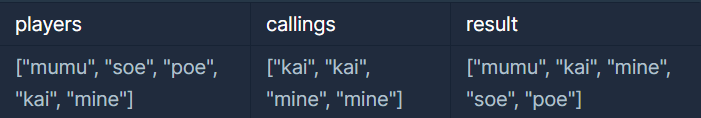

## 입출력 예 설명

### 입출력 예 #1

4등인 "kai" 선수가 2번 추월하여 2등이 되고 앞서 3등, 2등인 "poe", "soe" 선수는 4등, 3등이 됩니다. 5등인 "mine" 선수가 2번 추월하여 4등, 3등인 "poe", "soe" 선수가 5등, 4등이 되고 경주가 끝납니다. 1등부터 배열에 담으면 ["mumu", "kai", "mine", "soe", "poe"]이 됩니다.

## 첫 번째 방법

1. calling의 index를 idx에 저장.
2. players[idx]와 players[idx - 1]과 스왑한 후 players을 return.

결과 : 실패 

-> 시간 초과

In [23]:
def solution(players, callings):
    
    for calling in callings:
        idx = players.index(calling)
        players[idx], players[idx - 1] = players[idx - 1], players[idx]
    return players
solution(["mumu", "soe", "poe", "kai", "mine"], ["kai", "kai", "mine", "mine"])

['mumu', 'kai', 'mine', 'soe', 'poe']

## 두 번째 방법

1. 입력받은 players의 원소와 원소의 인덱스를 키 값, 값 키로하는 딕셔너리를 두 개 생성.
2. callings를 순차적으로 탐색해 추월한 사람과 추월당한 사람의 키와 값을 업데이트.
3. 인덱스를 키로 하는 딕셔너리의 값을 리스트 형태로 return.

결과 : 성공

-> index함수를 사용하는 것보다 딕셔너리로 인덱스를 하나하나 관리해나가는 것이 보다 효율적.

In [36]:
def solution(players, callings):
    players_idx = {player : i for i, player in enumerate(players)}
    idx_players = {i : player for i, player in enumerate(players)}

    for calling in callings:
        player_idx = players_idx[calling]
        change_player = idx_players[player_idx - 1]

        players_idx[change_player] = player_idx
        players_idx[calling] = player_idx - 1
        idx_players[player_idx - 1] = calling
        idx_players[player_idx] = change_player
        
    return list(idx_players.values())
solution(["mumu", "soe", "poe", "kai", "mine"], ["kai", "kai", "mine", "mine"])

['mumu', 'kai', 'mine', 'soe', 'poe']